"I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work."

# Imports

In [1]:
!pip install gym
!pip install ma_gym

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
from mpl_toolkits import mplot3d
import copy
import random

# Tabular Methods - Grid World 🌎

## Environment Definition

<h1> Multi-agent RL Environment Definition

<h3> Based on professors example


In [9]:
#Environment Definition
class MAGridWorldTab(gym.Env):
    
    metadata = { 'render.modes' : ['human', 'rgb_array'] }
        
    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = int(self.size*4)
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Box(low=0, high=self.size, shape=(self.size, self.size))
        self.action_space = spaces.Discrete(5)

    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()
        observation = tuple([tuple(pos) for pos in self.agent_pos])
        return observation


    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist


    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])


    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])
            
            if new_dist < old_dist:
                rewards[i] = -0.1
            elif new_dist > old_dist:
                rewards[i] = -0.5

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -0.5
            
            if (self.agent_pos[i] == self.goal_pos[i]):
                if not self.done[i]:
                  rewards[i] = 10
                self.done[i] = True
                
            else:
                self.done[i] = False

        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]
            
        observation = tuple([tuple(pos) for pos in self.agent_pos])
        info = {}
        return observation, rewards, self.done, info #all(done)



    def update_agent_pos(self, agent, action):
        next_pos = copy.copy(self.agent_pos[agent])
        if self.done[agent]:
          pass
        elif action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')
            
        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass
        

    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

    def getGoalPos(self):
      return tuple([tuple(pos) for pos in self.goal_pos])

## Greedy Agent Definition

In [10]:
#Agent that uses the greedy epsilon approach
class GreedyEpsAgentTab():

  def __init__(self, eps, Q, action_space):
    self.eps = eps
    self.Q = Q
    self.action_space = action_space

  def get_action(self, state):
    eps_val = np.random.uniform(0, 1)

    if eps_val < self.eps:
      return self.action_space.sample()
    else:
      return self.Q[state].index(max(self.Q[state]))

  def update_eps(self, eps):
    self.eps = eps

  def __str__(self):
    return f'This agent works in an environment with {len(self.Q)} states and {self.action_space.n} possible actions'

## Helper Functions

In [11]:
#Convert Single value action into list of actions
def convertAction(a, gridSize, nAgents, nActions):
  actions = []
  for i in reversed(range(nAgents)):
    count = int(a/(nActions**i))
    actions.append(count)
    a = a - (count * (nActions**i))
  return actions

In [12]:
#Check if all agents are done
def allDone(done):
  for d in done:
    if not d:
      return False
  return True

## Config

In [13]:
config = {
    'N_AGENTS': 3,
    'GRID_SIZE': 5
}

## Q-Learning

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

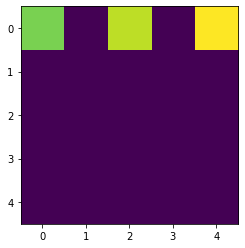

<IPython.core.display.Javascript object>

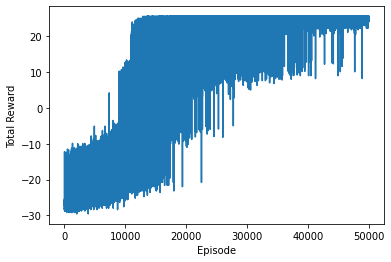

In [14]:
#Q-Learning: Deterministic with Greedy Epsilon Policy

#Initialize Environment
env = MAGridWorldTab(config['GRID_SIZE'], config['N_AGENTS'])
numAgents = config['N_AGENTS']

#Initialize Q values
totalRewards = []
#epsilons = []
#cumRewards = [0]
Q = {tuple(env.reset()):[np.random.choice(5) for i in range(5**numAgents)],tuple(env.getGoalPos()):[0 for i in range(5**numAgents)]}
alpha = 0.01
gamma = 0.99

#Initialize Greedy Epsilon Agent
epsilon = 1
endEps = 0.01
agent = GreedyEpsAgentTab(epsilon, Q, env.action_space)

#Our initial policy can be an even distribution
numEpisodes = 50000
episode = 0

#Loop through episodes, training agent using Q-Learning
while(episode < numEpisodes):
  #epsilons.append(agent.eps)
  s = env.reset()
  done = env.done

  rTracker = 0
  while not allDone(done):
    #Take action, get results
    a = agent.get_action(s)
    sP, r, done, info = env.step(convertAction(a, config['GRID_SIZE'], config['N_AGENTS'], env.action_space.n))
    r = sum(r)

    #Check if state has been found yet, if not then add random Q values for actions
    if sP not in Q.keys():
      Q[sP] = [np.random.choice(5) for i in range(5**numAgents)]

    #Update Q value
    Q[s][a] = Q[s][a] + (alpha*(r + (gamma*max(Q[sP])) - Q[s][a]))
    s = sP
    rTracker += r
  #Progress episode counter
  episode += 1
  totalRewards.append(rTracker)
  #cumRewards.append(cumRewards[episode-1] + rTracker)
  agent.update_eps((endEps/epsilon)**(episode/numEpisodes))

#policy = [Q[s].index(max(Q[s])) for s in range(env.observation_space.n)]

#Create and reset Deterministic Grid Environment
env = MAGridWorldTab(config['GRID_SIZE'], config['N_AGENTS'])
obs = env.reset()

#Take random steps in environment until done
done = env.done
output_grid = widgets.Grid(2, 2)

with output_grid.output_to(0, 0):
  output_grid.clear_cell()
  env.render()
  time.sleep(1)

while not allDone(done):
  obs, reward, done, info = env.step(convertAction(agent.get_action(obs), config['GRID_SIZE'], config['N_AGENTS'], env.action_space.n))
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

plt.plot([i for i in range(numEpisodes)], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
#plt.plot([i for i in range(numEpisodes)], epsilons)
#plt.xlabel("Episode")
#plt.ylabel("Epsilon")
plt.show()

## Double Q-Learning

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

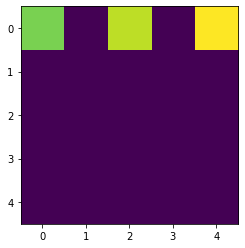

<IPython.core.display.Javascript object>

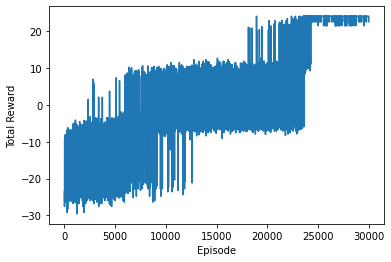

In [15]:
#Double Q-Learning: Deterministic with Greedy Epsilon Policy

#Initialize Environment
env = MAGridWorldTab(config['GRID_SIZE'], config['N_AGENTS'])
numAgents = config['N_AGENTS']

#Initialize Q values
totalRewards = []
cumRewards = [0]
QA = {tuple(env.reset()):[np.random.choice(5) for i in range(5**numAgents)],tuple(env.getGoalPos()):[0 for i in range(5**numAgents)]}
QB = {tuple(env.reset()):[np.random.choice(5) for i in range(5**numAgents)],tuple(env.getGoalPos()):[0 for i in range(5**numAgents)]}
alpha = 0.01
gamma = 0.99

#Initialize Greedy Epsilon Agent
epsilonA = 1
endEpsilonA = 0.01
agentA = GreedyEpsAgentTab(epsilonA, QA, env.action_space)
epsilonB = 1
endEpsilonB = 0.01
agentB = GreedyEpsAgentTab(epsilonB, QB, env.action_space)

#Our initial policy can be an even distribution
numEpisodes = 30000
episode = 0

#Loop through episodes, training agent using Q-Learning
while(episode < numEpisodes):
  s = env.reset()
  done = [False for i in range(numAgents)]

  rTracker = 0
  if max(QA[s]) > max(QB[s]):
      a = agentA.get_action(s)
  else:
      a = agentB.get_action(s)
  while not allDone(done):
    sP, r, done, info = env.step(convertAction(a, config['GRID_SIZE'], config['N_AGENTS'], env.action_space.n))
    r = sum(r)

    #Check if state has been found yet, if not then add Q values for the state
    if sP not in QA.keys():
      QA[sP] = [np.random.choice(5) for i in range(5**numAgents)]
      QB[sP] = [np.random.choice(5) for i in range(5**numAgents)]

    #Pick one of the two Q values to use for choosing next action
    if np.random.choice(2):
      nextAction = QA[sP].index(max(QA[sP]))
      QA[s][a] = QA[s][a] + (alpha*(r + (gamma*QB[sP][nextAction]) - QA[s][a]))
    else:
      nextAction = QB[sP].index(max(QB[sP]))
      QB[s][a] = QB[s][a] + (alpha*(r + (gamma*QA[sP][nextAction]) - QB[s][a]))
    a = nextAction
    s = sP
    rTracker += r

  #Increment episode, yada yada yada
  episode += 1
  totalRewards.append(rTracker)
  cumRewards.append(cumRewards[episode-1] + rTracker)
  agentA.update_eps((endEpsilonA/epsilonA)**(episode/numEpisodes))
  agentB.update_eps((endEpsilonB/epsilonB)**(episode/numEpisodes))


#Create and reset Deterministic Grid Environment
env = MAGridWorldTab(config['GRID_SIZE'], config['N_AGENTS'])
s = env.reset()

#Take random steps in environment until done
done = [False for i in range(numAgents)]
output_grid = widgets.Grid(2, 2)

with output_grid.output_to(0, 0):
  output_grid.clear_cell()
  env.render()
  time.sleep(1)

if max(QA[s]) > max(QB[s]):
  a = agentA.get_action(s)
else:
  a = agentB.get_action(s)
while not allDone(done):
  sP, reward, done, info = env.step(convertAction(a, config['GRID_SIZE'], config['N_AGENTS'], env.action_space.n))
  if np.random.choice(2):
    nextAction = QA[sP].index(max(QA[sP]))
  else:
    nextAction = QB[sP].index(max(QB[sP]))
  a = nextAction
  s = sP
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

plt.plot([i for i in range(numEpisodes)], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
plt.show()

# DQN - GridWorld 🌎

## Environment Definition

In [16]:
#Environment Definition
class MAGridWorld(gym.Env):
    
    metadata = { 'render.modes' : ['human', 'rgb_array'] }
        
    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = int(self.size*4)
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Box(low=0, high=self.size, shape=(self.size, self.size))
        self.action_space = spaces.Discrete(5)

    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()
        observation = tuple([tuple(pos) for pos in self.agent_pos])
        return observation


    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist


    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])


    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])
            
            if new_dist < old_dist:
                rewards[i] = -0.1
            elif new_dist > old_dist:
                rewards[i] = -0.5

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -0.5
            
            if (self.agent_pos[i] == self.goal_pos[i]):
                if not self.done[i]:
                  rewards[i] = 10
                self.done[i] = True
                
            else:
                self.done[i] = False

        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]
            
        observation = tuple([tuple(pos) for pos in self.agent_pos])
        info = {}
        return observation, rewards, self.done, info #all(done)



    def update_agent_pos(self, agent, action):
        next_pos = copy.copy(self.agent_pos[agent])
        if self.done[agent]:
          pass
        elif action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')
            
        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass
        

    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

    def getGoalPos(self):
      return tuple([tuple(pos) for pos in self.goal_pos])

## Greedy-EPS Agent 

In [17]:
#Agent that uses the greedy epsilon approach
class GreedyEpsAgent():

  def __init__(self, eps, Q, action_space):
    self.eps = eps
    self.Q = Q
    self.action_space = action_space

  def get_action(self, state):
    eps_val = np.random.uniform(0, 1)

    if eps_val < self.eps:
      return self.action_space.sample()
    else:
      return int(torch.argmax(self.Q(state)))
        

  def update_eps(self, eps):
    self.eps = eps

  def __str__(self):
    return f'This agent works in an environment with {len(self.Q)} states and {self.action_space.n} possible actions'

## Helper Functions

In [18]:
#Check if all agents are done
def allDone(done):
  for d in done:
    if not d:
      return False
  return True

## Config

In [19]:
config = {
    'N_AGENTS': 2,
    'GRID_SIZE': 5
}

## DQN - Agents don't see each other

### NN Definition

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 30)
        self.fc2 = nn.Linear(30, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


### Training

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

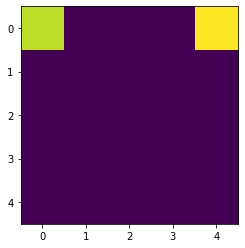

<IPython.core.display.Javascript object>

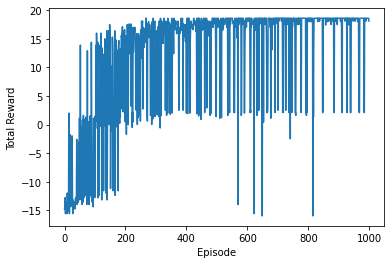

In [ ]:
#DQN-Learning: Applied to Deterministic Grid Environment

#Initialize Environment
env = MAGridWorld(config['GRID_SIZE'], config['N_AGENTS'])
numAgents = config['N_AGENTS']

#Create list for total rewards
totalRewards = []

#Initialize Networks
Qs = [Net() for i in range(numAgents)]
Q_Targets = [copy.deepcopy(Q) for Q in Qs]
copyInterval = 500
step = 0

#Define the loss function
criterion = nn.MSELoss()
optimizers = [optim.Adam(Q.parameters(), lr=0.0001) for Q in Qs]

#Define Discount Factor (gamma)
gamma = 0.9

#Initialize Greedy Epsilon Agent for Q
epsilon = 1
endEpsilon = 0.01
agents = [GreedyEpsAgent(epsilon, Q, env.action_space) for Q in Qs]

#Define Experience Replay list, its max size, and the mini batch size
replays = [[] for i in range(numAgents)]
maxReplay = 50
miniBatchSize = 5

#Our initial policy can be an even distribution
numEpisodes = 1000
episode = 0

#Loop through episodes, training agent using Q-Learning
while(episode < numEpisodes):
  s = env.reset()
  done = env.done

  rTracker = 0
  while not allDone(done):
    step += 1

    #Take action based on greatest Q-Value from Q for state s
    a = [agent.get_action(torch.tensor([[si]]).float()) for agent, si in zip(agents, s)]
    sP, r, done, info = env.step(a)

    #Zero out gradient and take random minibatch
    for optimizer in optimizers:
      optimizer.zero_grad()
    
    for i in range(numAgents):
      minibatch = random.sample(replays[i], min(len(replays[i]), miniBatchSize))
      if len(minibatch) > 3:
        #Break up minibatch into the different columns of values
        columns = list(zip(*minibatch))
        states = torch.reshape(torch.tensor(columns[0]).float(),[len(minibatch),2])
        actions = torch.tensor(columns[1])
        rewards = torch.tensor(columns[2])
        newStates = torch.reshape(torch.tensor(columns[3]).float(),[len(minibatch), 2])

        #Select Q and Q_Target
        Q = Qs[i]
        Q_Target = Q_Targets[i]

        #Get targets and outputs
        targets = (gamma*torch.max(Q_Target(newStates), 1)[0]) + rewards
        outputs = torch.reshape(torch.gather(Q(states), 1, actions), [len(minibatch)])

        #Calculate loss and gradients
        loss = criterion(outputs, targets)
        loss.backward()

        optimizers[i].step()

    #Take a step using SGD
    optimizer.step()

    #Storing in replay
    for i,replay in enumerate(replays):
      if len(replay) >= maxReplay:
        replay.append([s[i],[a[i]],r[i],sP[i],done[i]])
        replay.pop(0)
      else:
        replay.append([s[i],[a[i]],r[i],sP[i],done[i]])

    #Updating target Q if necessary
    if step % copyInterval == 0:
      Q_Targets = [copy.deepcopy(Q) for Q in Qs]

    s = sP
    rTracker += sum(r)
  episode += 1
  totalRewards.append(rTracker)
  #cumRewards.append(cumRewards[episode-1] + rTracker)
  for agent in agents:
      agent.update_eps((endEpsilon/epsilon)**(episode/numEpisodes))

#policy = [int(agent.get_action(torch.tensor([[s]]).float())) for s in range(env.observation_space.n)]

#Create and reset Deterministic Grid Environment
env = MAGridWorld(config['GRID_SIZE'], config['N_AGENTS'])
obs = env.reset()

#Take random steps in environment until done
done = env.done
output_grid = widgets.Grid(2, 2)

with output_grid.output_to(0, 0):
  output_grid.clear_cell()
  env.render()
  time.sleep(1)

while not allDone(done):
  obs, reward, done, info = env.step([agent.get_action(torch.tensor([[si]]).float()) for agent, si in zip(agents, obs)])
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

plt.plot([i for i in range(len(totalRewards))], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
plt.show()

## DQN - Agents see each other

### NN Definition (Our Q-Approximation)

In [20]:
class NetFullView(nn.Module):
    def __init__(self, nAgents):
        super().__init__()
        self.fc1 = nn.Linear(nAgents*2, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


### Training

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

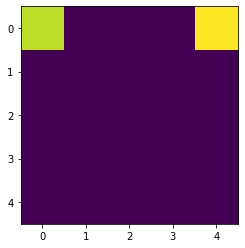

<IPython.core.display.Javascript object>

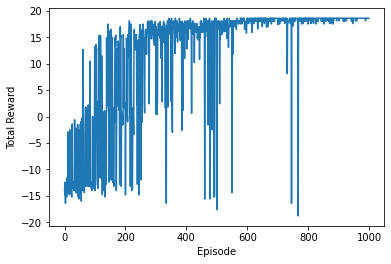

In [21]:
#DQN-Learning: Applied to Deterministic Grid Environment

#Initialize Environment
env = MAGridWorld(config['GRID_SIZE'], config['N_AGENTS'])
numAgents = config['N_AGENTS']

#Create list for total rewards
totalRewards = []

#Initialize Networks
Qs = [NetFullView(numAgents) for i in range(numAgents)]
Q_Targets = [copy.deepcopy(Q) for Q in Qs]
copyInterval = 500
step = 0

#Define the loss function
criterion = nn.MSELoss()
optimizers = [optim.SGD(Q.parameters(), lr=0.0001, momentum=0.9) for Q in Qs]

#Define Discount Factor (gamma)
gamma = 0.9

#Initialize Greedy Epsilon Agent for Q
epsilon = 1
endEpsilon = 0.01
agents = [GreedyEpsAgent(epsilon, Q, env.action_space) for Q in Qs]

#Define Experience Replay list, its max size, and the mini batch size
replays = [[] for i in range(numAgents)]
maxReplay = 100
miniBatchSize = 10

#Our initial policy can be an even distribution
numEpisodes = 1000
episode = 0

#Loop through episodes, training agent using Q-Learning
while(episode < numEpisodes):
  s = env.reset()
  s = [element for sublist in s for element in sublist]
  done = env.done

  rTracker = 0
  while not allDone(done):
    step += 1

    #Take action based on greatest Q-Value from Q for state s
    a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
    sP, r, done, info = env.step(a)
    sP = [element for sublist in sP for element in sublist]

    #Zero out gradient and take random minibatch
    for optimizer in optimizers:
      optimizer.zero_grad()
    
    for i in range(numAgents):
      minibatch = random.sample(replays[i], min(len(replays[i]), miniBatchSize))
      if len(minibatch) > 3:
        #Break up minibatch into the different columns of values
        columns = list(zip(*minibatch))
        states = torch.reshape(torch.tensor(columns[0]).float(),[len(minibatch),2*numAgents])
        actions = torch.tensor(columns[1])
        rewards = torch.tensor(columns[2])
        newStates = torch.reshape(torch.tensor(columns[3]).float(),[len(minibatch), 2*numAgents])

        #Select Q and Q_Target
        Q = Qs[i]
        Q_Target = Q_Targets[i]

        #Get targets and outputs
        targets = (gamma*torch.max(Q_Target(newStates), 1)[0]) + rewards
        outputs = torch.reshape(torch.gather(Q(states), 1, actions), [len(minibatch)])

        #Calculate loss and gradients
        loss = criterion(outputs, targets)
        #loss = torch.mean(outputs - targets)
        loss.backward()

        optimizers[i].step()

    #Take a step using SGD
    #for optimizer in optimizers:
    #  optimizer.step()

    #Storing in replay
    for i,replay in enumerate(replays):
      if len(replay) >= maxReplay:
        replay.append([s,[a[i]],r[i],sP,done[i]])
        replay.pop(0)
      else:
        replay.append([s,[a[i]],r[i],sP,done[i]])

    #Updating target Q if necessary
    if step % copyInterval == 0:
      Q_Targets = [copy.deepcopy(Q) for Q in Qs]

    s = sP
    rTracker += sum(r)
  episode += 1
  totalRewards.append(rTracker)
  #cumRewards.append(cumRewards[episode-1] + rTracker)
  for agent in agents:
      agent.update_eps((endEpsilon/epsilon)**(episode/numEpisodes))

#policy = [int(agent.get_action(torch.tensor([[s]]).float())) for s in range(env.observation_space.n)]

#Create and reset Deterministic Grid Environment
env = MAGridWorld(config['GRID_SIZE'], config['N_AGENTS'])
obs = env.reset()
obs = [element for sublist in obs for element in sublist]

#Take random steps in environment until done
done = env.done
output_grid = widgets.Grid(2, 2)

with output_grid.output_to(0, 0):
  output_grid.clear_cell()
  env.render()
  time.sleep(1)

while not allDone(done):
  obs, reward, done, info = env.step([agent.get_action(torch.tensor([[obs]]).float()) for agent in agents])
  obs = [element for sublist in obs for element in sublist]
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

plt.plot([i for i in range(len(totalRewards))], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
plt.show()

# DQN - MA_GYM ENVs 🌎

## Greedy Eps Agent

In [ ]:
#Agent that uses the greedy epsilon approach
class GreedyEpsAgent2():

  def __init__(self, eps, Q, action_space):
    self.eps = eps
    self.Q = Q
    self.action_space = action_space

  def get_action(self, state):
    eps_val = np.random.uniform(0, 1)

    if eps_val < self.eps:
      return self.action_space.sample()[0]
    else:
      return int(torch.argmax(self.Q(state)))
        

  def update_eps(self, eps):
    self.eps = eps

  def __str__(self):
    return f'This agent works in an environment with {len(self.Q)} states and {self.action_space.n} possible actions'

## Switch 2 🎮 🎮

### NN Definition (Our Q-Approximation)

In [ ]:
class Switch2Net(nn.Module):
    def __init__(self, nAgents):
        super().__init__()
        self.fc1 = nn.Linear(nAgents*2, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


### Training

/usr/local/lib/python3.7/dist-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


1 :  -9.999999999999996
2 :  -3.7000000000000046
3 :  -9.999999999999996
4 :  -9.999999999999996
5 :  -9.999999999999996
6 :  -9.999999999999996
7 :  -9.999999999999996
8 :  -9.999999999999996
9 :  -9.999999999999996
10 :  -9.999999999999996
11 :  -9.999999999999996
12 :  -9.999999999999996
13 :  -2.300000000000002
14 :  -3.7000000000000046
15 :  -9.999999999999996
16 :  -9.999999999999996
17 :  -9.999999999999996
18 :  -9.999999999999996
19 :  -9.999999999999996
20 :  -9.999999999999996
21 :  -9.999999999999996
22 :  -9.999999999999996
23 :  -9.999999999999996
24 :  -3.200000000000004
25 :  -9.999999999999996
26 :  -9.999999999999996
27 :  -3.6000000000000045
28 :  -2.5000000000000027
29 :  -9.999999999999996
30 :  -9.999999999999996
31 :  -9.999999999999996
32 :  -9.999999999999996
33 :  -9.999999999999996
34 :  -9.999999999999996
35 :  -4.200000000000001
36 :  -9.999999999999996
37 :  -1.8000000000000014
38 :  -9.999999999999996
39 :  -3.8000000000000047
40 :  -9.999999999999996
41 

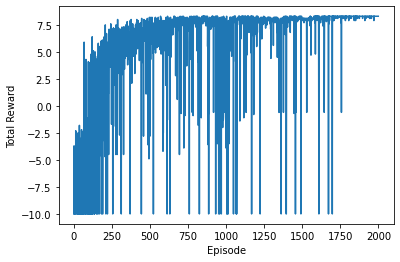

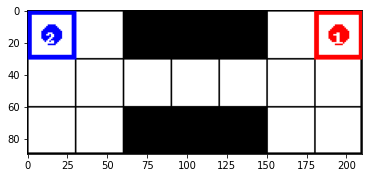

In [ ]:
#DQN-Learning: Applied to Deterministic Grid Environment

#Initialize Environment
env = gym.make('ma_gym:Switch2-v0')
numAgents = 2

#Create list for total rewards
totalRewards = []

#Initialize Networks
Qs = [Switch2Net(numAgents) for i in range(numAgents)]
Q_Targets = [copy.deepcopy(Q) for Q in Qs]
copyInterval = 50
step = 0

#Define the loss function
criterion = nn.MSELoss()
optimizers = [optim.Adam(Q.parameters(), lr=0.0001) for Q in Qs]

#Define Discount Factor (gamma)
gamma = 0.9

#Initialize Greedy Epsilon Agent for Q
epsilon = 1
endEpsilon = 0.01
agents = [GreedyEpsAgent2(epsilon, Q, env.action_space) for Q in Qs]

#Define Experience Replay list, its max size, and the mini batch size
replays = [[] for i in range(numAgents)]
maxReplay = 256
miniBatchSize = 30

#Our initial policy can be an even distribution
numEpisodes = 2000
episode = 0

#Loop through episodes, training agent using Q-Learning
#and (sum(totalRewards[max(-10,-len(totalRewards)):])/10) < 8
while(episode < numEpisodes):
  s = env.reset()
  s = [element for sublist in s for element in sublist]
  done = [False for i in range(env.n_agents)]

  rTracker = 0
  while not all(done):
    step += 1

    #Take action based on greatest Q-Value from Q for state s
    a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
    sP, r, done, info = env.step(a)
    sP = [element for sublist in sP for element in sublist]

    #Zero out gradient and take random minibatch
    for optimizer in optimizers:
      optimizer.zero_grad()
    
    for i in range(numAgents):
      minibatch = random.sample(replays[i], min(len(replays[i]), miniBatchSize))
      if len(minibatch) > 3:
        #Break up minibatch into the different columns of values
        columns = list(zip(*minibatch))
        states = torch.reshape(torch.tensor(columns[0]).float(),[len(minibatch),2*numAgents])
        actions = torch.tensor(columns[1])
        rewards = torch.tensor(columns[2])
        newStates = torch.reshape(torch.tensor(columns[3]).float(),[len(minibatch), 2*numAgents])

        #Select Q and Q_Target
        Q = Qs[i]
        Q_Target = Q_Targets[i]

        #Get targets and outputs
        targets = (gamma*torch.max(Q_Target(newStates), 1)[0]) + rewards
        outputs = torch.reshape(torch.gather(Q(states), 1, actions), [len(minibatch)])

        #Calculate loss and gradients
        #loss = criterion(outputs, targets)
        loss = torch.mean(torch.abs(outputs - targets))
        loss.backward()

        optimizers[i].step()

    #Take a step using SGD
    #for optimizer in optimizers:
    #  optimizer.step()

    #Storing in replay
    for i,replay in enumerate(replays):
      if len(replay) >= maxReplay:
        replay.append([s,[a[i]],r[i],sP,done[i]])
        replay.pop(0)
      else:
        replay.append([s,[a[i]],r[i],sP,done[i]])

    #Updating target Q if necessary
    if step % copyInterval == 0:
      Q_Targets = [copy.deepcopy(Q) for Q in Qs]

    s = sP
    rTracker += sum(r)
  episode += 1
  totalRewards.append(rTracker)
  #print(episode,': ', rTracker)
  #cumRewards.append(cumRewards[episode-1] + rTracker)
  for agent in agents:
      agent.update_eps((endEpsilon/epsilon)**(episode/numEpisodes))

#policy = [int(agent.get_action(torch.tensor([[s]]).float())) for s in range(env.observation_space.n)]

plt.plot([i for i in range(len(totalRewards))], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
plt.show()

#Create and reset Deterministic Grid Environment
env = gym.make('ma_gym:Switch2-v0')

#Take random steps in environment until done
for agent in agents:
  agent.update_eps(0)
s = env.reset()
s = [element for sublist in s for element in sublist]
done = [False for i in range(env.n_agents)]
while not all(done):
  a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
  s, r, done, info = env.step(a)
  s = [element for sublist in s for element in sublist]
plt.imshow(env.render('rgb_array'))

## Switch 4 🎮 🎮 🎮 🎮

### NN Definition (Our Q-Approximation)

In [ ]:
class Switch4Net(nn.Module):
    def __init__(self, nAgents):
        super().__init__()
        self.fc1 = nn.Linear(nAgents*2, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


### Training

/usr/local/lib/python3.7/dist-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


1 :  -19.999999999999993
2 :  -19.999999999999993
3 :  -19.999999999999993
4 :  -19.999999999999993
5 :  -13.600000000000016
6 :  -19.999999999999993
7 :  -19.999999999999993
8 :  -19.999999999999993
9 :  -14.500000000000002
10 :  -19.999999999999993
11 :  -19.999999999999993
12 :  -19.999999999999993
13 :  -13.000000000000016
14 :  -19.999999999999993
15 :  -19.999999999999993
16 :  -19.999999999999993
17 :  -14.799999999999997
18 :  -19.999999999999993
19 :  -19.999999999999993
20 :  -19.999999999999993
21 :  -12.900000000000016
22 :  -19.999999999999993
23 :  -14.500000000000004
24 :  -19.999999999999993
25 :  -14.200000000000008
26 :  -19.999999999999993
27 :  -19.999999999999993
28 :  -19.999999999999993
29 :  -19.999999999999993
30 :  -19.999999999999993
31 :  -19.999999999999993
32 :  -19.999999999999993
33 :  -19.999999999999993
34 :  -19.999999999999993
35 :  -19.999999999999993
36 :  -19.999999999999993
37 :  -19.999999999999993
38 :  -13.600000000000016
39 :  -14.30000000000

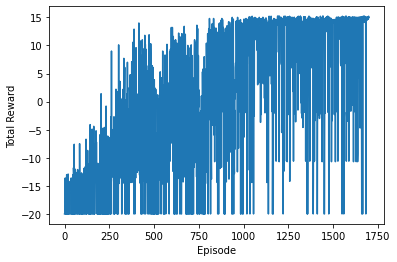

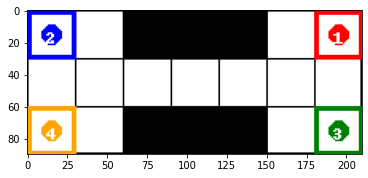

In [ ]:
#DQN-Learning: Applied to Deterministic Grid Environment

#Initialize Environment
env = gym.make('ma_gym:Switch4-v0')
numAgents = 4

#Create list for total rewards
totalRewards = []

#Initialize Networks
Qs = [Switch4Net(numAgents) for i in range(numAgents)]
Q_Targets = [copy.deepcopy(Q) for Q in Qs]
copyInterval = 100
step = 0

#Define the loss function
criterion = nn.MSELoss()
optimizers = [optim.Adam(Q.parameters(), lr=0.0001) for Q in Qs]

#Define Discount Factor (gamma)
gamma = 0.9

#Initialize Greedy Epsilon Agent for Q
epsilon = 1
endEpsilon = 0.01
agents = [GreedyEpsAgent2(epsilon, Q, env.action_space) for Q in Qs]

#Define Experience Replay list, its max size, and the mini batch size
replays = [[] for i in range(numAgents)]
maxReplay = 512
miniBatchSize = 52

#Our initial policy can be an even distribution
numEpisodes = 2000
episode = 0

#Loop through episodes, training agent using Q-Learning
while(episode < numEpisodes) and (sum(totalRewards[max(-10,-len(totalRewards)):])/10) < 15:
  s = env.reset()
  s = [element for sublist in s for element in sublist]
  done = [False for i in range(env.n_agents)]

  rTracker = 0
  while not all(done):
    step += 1

    #Take action based on greatest Q-Value from Q for state s
    a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
    sP, r, done, info = env.step(a)
    sP = [element for sublist in sP for element in sublist]

    #Zero out gradient and take random minibatch
    for optimizer in optimizers:
      optimizer.zero_grad()
    
    for i in range(numAgents):
      minibatch = random.sample(replays[i], min(len(replays[i]), miniBatchSize))
      if len(minibatch) > 3:
        #Break up minibatch into the different columns of values
        columns = list(zip(*minibatch))
        states = torch.reshape(torch.tensor(columns[0]).float(),[len(minibatch),2*numAgents])
        actions = torch.tensor(columns[1])
        rewards = torch.tensor(columns[2])
        newStates = torch.reshape(torch.tensor(columns[3]).float(),[len(minibatch), 2*numAgents])

        #Select Q and Q_Target
        Q = Qs[i]
        Q_Target = Q_Targets[i]

        #Get targets and outputs
        targets = (gamma*torch.max(Q_Target(newStates), 1)[0]) + rewards
        outputs = torch.reshape(torch.gather(Q(states), 1, actions), [len(minibatch)])

        #Calculate loss and gradients
        #loss = criterion(outputs, targets)
        loss = torch.mean(torch.abs(outputs - targets))
        loss.backward()

        optimizers[i].step()

    #Take a step using SGD
    #for optimizer in optimizers:
    #  optimizer.step()

    #Storing in replay
    for i,replay in enumerate(replays):
      if len(replay) >= maxReplay:
        replay.append([s,[a[i]],r[i],sP,done[i]])
        replay.pop(0)
      else:
        replay.append([s,[a[i]],r[i],sP,done[i]])

    #Updating target Q if necessary
    if step % copyInterval == 0:
      Q_Targets = [copy.deepcopy(Q) for Q in Qs]

    s = sP
    rTracker += sum(r)
  episode += 1
  totalRewards.append(rTracker)
  #print(episode,': ', rTracker)
  #cumRewards.append(cumRewards[episode-1] + rTracker)
  for agent in agents:
      agent.update_eps((endEpsilon/epsilon)**(episode/numEpisodes))

#policy = [int(agent.get_action(torch.tensor([[s]]).float())) for s in range(env.observation_space.n)]

plt.plot([i for i in range(len(totalRewards))], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
plt.show()

#Take random steps in environment until done
for agent in agents:
  agent.update_eps(0)
s = env.reset()
s = [element for sublist in s for element in sublist]
done = [False for i in range(env.n_agents)]
while not all(done):
  a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
  s, r, done, info = env.step(a)
  s = [element for sublist in s for element in sublist]
plt.imshow(env.render('rgb_array'))

## Predator Prey 5x5 👽

### NN Definition (Our Q-Approximation)

In [ ]:
class PredatorPrey5x5Net(nn.Module):
    def __init__(self, numAgents):
        super().__init__()
        self.fc1 = nn.Linear(numAgents*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


### Training

1 :  -12.999999999999973
2 :  -11.399999999999974
3 :  -23.999999999999964
4 :  9.84
5 :  -5.719999999999972
6 :  -11.999999999999961
7 :  2.6600000000000055
8 :  -15.999999999999979
9 :  4.380000000000001
10 :  -9.99999999999998
11 :  -6.9999999999999805
12 :  -22.999999999999975
13 :  -9.999999999999966
14 :  -13.99999999999997
15 :  7.62
16 :  -27.999999999999968
17 :  -14.999999999999972
18 :  -5.999999999999993
19 :  -25.999999999999964
20 :  8.56
21 :  0.5200000000000049
22 :  -17.99999999999996
23 :  0.3200000000000056
24 :  -11.799999999999965
25 :  -9.539999999999978
26 :  -6.819999999999975
27 :  -4.639999999999979
28 :  4.4
29 :  -0.579999999999993
30 :  -15.999999999999966
31 :  -10.999999999999963
32 :  -18.99999999999997
33 :  -11.99999999999996
34 :  -21.99999999999996
35 :  2.7200000000000024
36 :  -17.999999999999968
37 :  -10.99999999999996
38 :  -6.999999999999995
39 :  -21.999999999999968
40 :  -9.999999999999979
41 :  -15.999999999999963
42 :  6.540000000000001
43 

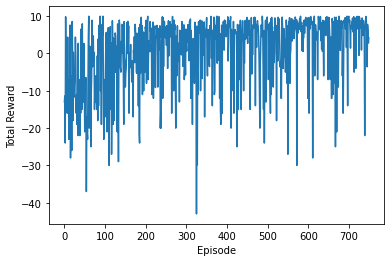

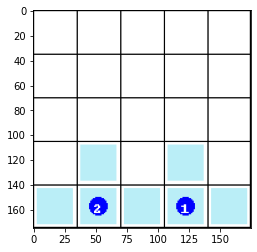

In [ ]:
#DQN-Learning: Applied to Deterministic Grid Environment

#Initialize Environment
env = gym.make('ma_gym:PredatorPrey5x5-v0')
numAgents = 2

#Create list for total rewards
totalRewards = []

#Initialize Networks
Qs = [PredatorPrey5x5Net(numAgents) for i in range(numAgents)]
Q_Targets = [copy.deepcopy(Q) for Q in Qs]
copyInterval = 100
step = 0

#Define the loss function
criterion = nn.MSELoss()
optimizers = [optim.Adam(Q.parameters()) for Q in Qs]

#Define Discount Factor (gamma)
gamma = 0.9

#Initialize Greedy Epsilon Agent for Q
epsilon = 1
endEpsilon = 0.01
agents = [GreedyEpsAgent2(epsilon, Q, env.action_space) for Q in Qs]

#Define Experience Replay list, its max size, and the mini batch size
replays = [[] for i in range(numAgents)]
maxReplay = 2048
miniBatchSize = 128

#Our initial policy can be an even distribution
numEpisodes = 750
episode = 0

#Loop through episodes, training agent using Q-Learning
while(episode < numEpisodes):
  s = env.reset()
  s = [element for sublist in s for element in sublist]
  done = [False for i in range(env.n_agents)]

  rTracker = 0
  while not all(done):
    step += 1

    #Take action based on greatest Q-Value from Q for state s
    a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
    sP, r, done, info = env.step(a)
    sP = [element for sublist in sP for element in sublist]

    #Zero out gradient and take random minibatch
    for optimizer in optimizers:
      optimizer.zero_grad()
    
    for i in range(numAgents):
      minibatch = random.sample(replays[i], min(len(replays[i]), miniBatchSize))
      if len(minibatch) > 3:
        #Break up minibatch into the different columns of values
        columns = list(zip(*minibatch))
        states = torch.reshape(torch.tensor(columns[0]).float(),[len(minibatch),28*numAgents])
        actions = torch.tensor(columns[1])
        rewards = torch.tensor(columns[2])
        newStates = torch.reshape(torch.tensor(columns[3]).float(),[len(minibatch), 28*numAgents])

        #Select Q and Q_Target
        Q = Qs[i]
        Q_Target = Q_Targets[i]

        #Get targets and outputs
        targets = (gamma*torch.max(Q_Target(newStates), 1)[0]) + rewards
        outputs = torch.reshape(torch.gather(Q(states), 1, actions), [len(minibatch)])

        #Calculate loss and gradients
        #loss = criterion(outputs, targets)
        loss = torch.mean(torch.square(outputs - targets))
        loss.backward()

        optimizers[i].step()

    #Take a step using SGD
    #for optimizer in optimizers:
    #  optimizer.step()

    #Storing in replay
    for i,replay in enumerate(replays):
      if len(replay) >= maxReplay:
        replay.append([s,[a[i]],r[i],sP,done[i]])
        replay.pop(0)
      else:
        replay.append([s,[a[i]],r[i],sP,done[i]])

    #Updating target Q if necessary
    if step % copyInterval == 0:
      Q_Targets = [copy.deepcopy(Q) for Q in Qs]

    s = sP
    rTracker += sum(r)
  episode += 1
  totalRewards.append(rTracker)
  #print(episode,': ', rTracker)
  #cumRewards.append(cumRewards[episode-1] + rTracker)
  for agent in agents:
      agent.update_eps((endEpsilon/epsilon)**(episode/numEpisodes))

#policy = [int(agent.get_action(torch.tensor([[s]]).float())) for s in range(env.observation_space.n)]

plt.plot([i for i in range(len(totalRewards))], totalRewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
#plt.plot([i for i in range(len(cumRewards))], cumRewards)
plt.show()

#Take random steps in environment until done
for agent in agents:
  agent.update_eps(0)
s = env.reset()
s = [element for sublist in s for element in sublist]
done = [False for i in range(env.n_agents)]
while not all(done):
  a = [agent.get_action(torch.tensor([[s]]).float()) for agent in agents]
  s, r, done, info = env.step(a)
  s = [element for sublist in s for element in sublist]
plt.imshow(env.render('rgb_array'))